# ---------------- Machine Learning - Modelos Supervisionados ---------------------------

### Vamos treinar 10 algorítmos diferentes:
* Naive Bayes (Gaussiano)
* Regressão Logística
* Decision Tree
* Random Forest
* Gradient Boosting
* k-Nearest Neighbors
* Perceptron
* Support Vector Machines - SVM
* Gradiente Estocástico Descendente
* Rede Neural (MLP) 

### 1) Ler tabela ABT gerada no Data Prep

In [46]:
import boto3
import pandas as pd
bucket='turing-bkt-treinamentos' 
data_key = 'Alunos/Turma_01/BrunoJ/ABT_aluno_BJ.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
df00 = pd.read_csv(data_location,sep=',',encoding='utf-8',error_bad_lines=False)
df00.shape

(891, 14)

In [47]:
df00.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_MISS,Embarked_Q,Embarked_S,LE_Cabin,LE_Ticket,target
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0,1,0,0,0,1,146,523,0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1,0,1,0,0,0,81,596,1
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1,0,0,0,0,1,146,669,1
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1,0,0,0,0,1,55,49,1
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0,1,0,0,0,1,146,472,0


### 2) Para minimização do overfitting vamos utilizar validação por Holdout

In [48]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/holdout.PNG", width=800, height=800)

### Mas o que é Overfitting ?

In [49]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/overfitting.png", width=800, height=800)

### Holdout: vamos gerar 2 tabelas: treino e teste
(A tabela de validação, utilizada para convergência e ajuste dos modelos é gerada automaticamente pelos algorítmos)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [50]:
from sklearn.model_selection import train_test_split

explicativas = df00.drop(['target'], axis=1)
resposta = df00["target"]

x_train, x_test, y_train, y_test = train_test_split(explicativas, resposta, test_size = 0.3, random_state = 0)

In [51]:
# Vamos verificar quantidade de linhas e colunas das tabelas geradas:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((623, 13), (268, 13), (623,), (268,))

In [52]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_MISS,Embarked_Q,Embarked_S,LE_Cabin,LE_Ticket
857,-1.566107,1.639196,-0.474545,-0.473674,-0.113846,0,1,0,0,0,1,119,23
52,-1.566107,1.485287,0.432793,-0.473674,0.896497,1,0,1,0,0,0,101,587
386,0.827377,-2.208522,4.062148,2.008933,0.295895,0,1,0,0,0,1,146,566
124,-1.566107,1.870059,-0.474545,0.767630,0.907738,0,1,0,0,0,1,98,417
578,0.827377,0.000000,0.432793,-0.473674,-0.357308,1,0,1,0,0,0,146,209


### Modelo 1) Naive Bayes Gaussiano
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
    
É uma técnica de classificação baseado no teorema de Bayes com uma suposição de independência entre os preditores. Em termos simples, um classificador Naive Bayes assume que a presença de uma característica particular em uma classe não está relacionada com a presença de qualquer outro recurso. Por exemplo, um fruto pode ser considerado como uma maçã se é vermelho, redondo, e tiver cerca de 3 polegadas de diâmetro. Mesmo que esses recursos dependam uns dos outros ou da existência de outras características, todas estas propriedades contribuem de forma independente para a probabilidade de que este fruto é uma maçã e é por isso que é conhecido como ‘Naive’ (ingênuo).    

In [53]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/gaussian_nb.jpg", width=700, height=700)



#### Treinamento do modelo

In [54]:
# 1) Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)


# Treino
y_pred_gaussian_train = gaussian.predict(x_train)
y_score_gaussian_train = gaussian.predict_proba(x_train)

# Teste
y_pred_gaussian_test = gaussian.predict(x_test)
y_score_gaussian_test = gaussian.predict_proba(x_test)


#### Avaliação do modelo

In [55]:
# from IPython.display import Image
# from IPython.core.display import HTML 
# Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/metricas_desemp.png", width=350, height=350)

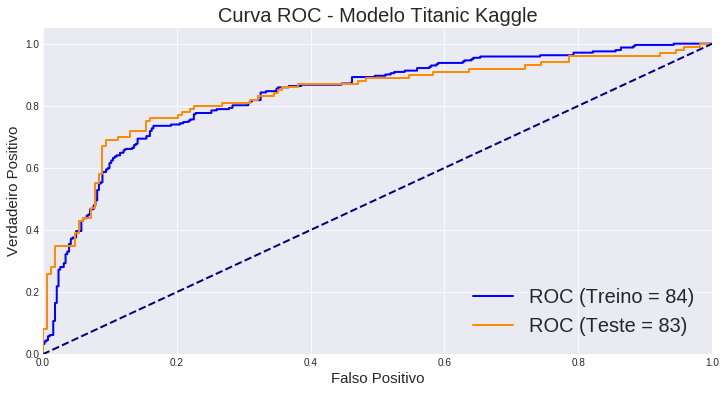

Acurácia, Gini e Área Curva ROC (Base de Treino):  79.29 68.0 84.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  81.72 66.0 83.0


In [56]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_gaussian_train = round(accuracy_score(y_pred_gaussian_train, y_train) * 100, 2)

#Teste
acc_gaussian_test = round(accuracy_score(y_pred_gaussian_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_gaussian_train, tpr_gaussian_train, thresholds = roc_curve(y_train, y_score_gaussian_train[:,1])
roc_auc_gaussian_train = 100*round(auc(fpr_gaussian_train, tpr_gaussian_train), 2)
gini_gaussian_train = 100*round((2*roc_auc_gaussian_train/100 - 1), 2)

# Teste
fpr_gaussian_test, tpr_gaussian_test, thresholds = roc_curve(y_test, y_score_gaussian_test[:,1])
roc_auc_gaussian_test = 100*round(auc(fpr_gaussian_test, tpr_gaussian_test), 2)
gini_gaussian_test = 100*round((2*roc_auc_gaussian_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_gaussian_train, tpr_gaussian_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_gaussian_train)
plt.plot(fpr_gaussian_test, tpr_gaussian_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_gaussian_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_gaussian_train, gini_gaussian_train, roc_auc_gaussian_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_gaussian_test, gini_gaussian_test, roc_auc_gaussian_test)


### Modelo 2) Regressão Logística

É uma técnica recomendada para situações em que a
variável dependente é de natureza dicotômica ou
binária. Quanto às independentes, tanto podem ser
categóricas ou não.

Uma vez que as variáveis independentes são de natureza numérica (interval/ordinal) devemos verificar a linearidade
entre a variável independente e a log(odds). 

Para o desenvolvimento deste modelo estamos considerando que todas independentes satisfazem tal condição.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [57]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/logistic_reg.png", width=500, height=500)

#### Treinamento do modelo

In [58]:
# 2) Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', 
                            dual=False, 
                            tol=0.0001, 
                            C=1, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=None, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=1)
logreg.fit(x_train, y_train)


# Treino
y_pred_logreg_train = logreg.predict(x_train)
y_score_logreg_train = logreg.predict_proba(x_train)

# Teste
y_pred_logreg_test = logreg.predict(x_test)
y_score_logreg_test = logreg.predict_proba(x_test)

#### Avaliação do modelo

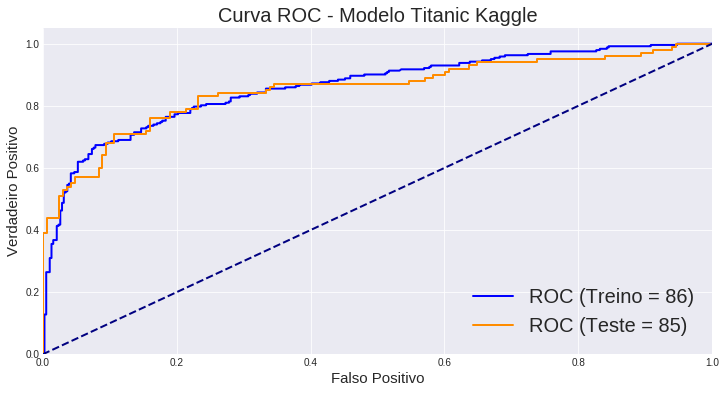

Acurácia, Gini e Área Curva ROC (Base de Treino):  80.26 72.0 86.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  79.85 70.0 85.0


In [59]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_logreg_train = round(accuracy_score(y_pred_logreg_train, y_train) * 100, 2)

#Teste
acc_logreg_test = round(accuracy_score(y_pred_logreg_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_logreg_train, tpr_logreg_train, thresholds = roc_curve(y_train, y_score_logreg_train[:,1])
roc_auc_logreg_train = 100*round(auc(fpr_logreg_train, tpr_logreg_train), 2)
gini_logreg_train = 100*round((2*roc_auc_logreg_train/100 - 1), 2)

# Teste
fpr_logreg_test, tpr_logreg_test, thresholds = roc_curve(y_test, y_score_logreg_test[:,1])
roc_auc_logreg_test = 100*round(auc(fpr_logreg_test, tpr_logreg_test), 2)
gini_logreg_test = 100*round((2*roc_auc_logreg_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_logreg_train)
plt.plot(fpr_logreg_test, tpr_logreg_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_logreg_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_logreg_train, gini_logreg_train, roc_auc_logreg_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_logreg_test, gini_logreg_test, roc_auc_logreg_test)

### Modelo 3) Support Vector Machines - SVM
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

O que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

In [60]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/svm_hiperp.png", width=400, height=400)

In [61]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/SVM_kernel.png", width=800, height=800)

#### Treinamento do modelo

In [62]:
# 3) Support Vector Machines
from sklearn.svm import SVC
import numpy as np

svc = SVC(C=1.0, 
          kernel='rbf', 
          degree=3, 
          gamma='scale', 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          random_state=None)

svc.fit(x_train, y_train)

# Treino
y_pred_svc_train = svc.predict(x_train)
#Converte para probabilidade
y_score_svc_train = 1/(1+np.exp(-svc.decision_function(x_train)))

# Teste
y_pred_svc_test = svc.predict(x_test)
#Converte para probabilidade
y_score_svc_test = 1/(1+np.exp(-svc.decision_function(x_test)))

#### Avaliaçao do modelo 

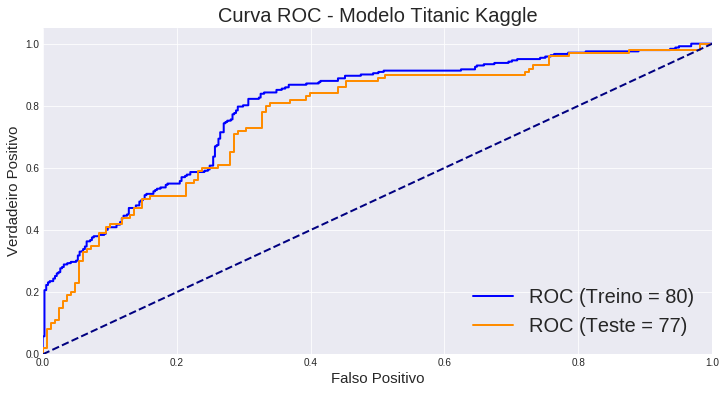

Acurácia, Gini e Área Curva ROC (Base de Treino):  70.95 60.0 80.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  71.64 54.0 77.0


In [63]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_svc_train = round(accuracy_score(y_pred_svc_train, y_train) * 100, 2)

#Teste
acc_svc_test = round(accuracy_score(y_pred_svc_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_svc_train, tpr_svc_train, thresholds = roc_curve(y_train, y_score_svc_train)
roc_auc_svc_train = 100*round(auc(fpr_svc_train, tpr_svc_train), 2)
gini_svc_train = 100*round((2*roc_auc_svc_train/100 - 1), 2)

# Teste
fpr_svc_test, tpr_svc_test, thresholds = roc_curve(y_test, y_score_svc_test)
roc_auc_svc_test = 100*round(auc(fpr_svc_test, tpr_svc_test), 2)
gini_svc_test = 100*round((2*roc_auc_svc_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_svc_train, tpr_svc_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_svc_train)
plt.plot(fpr_svc_test, tpr_svc_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_svc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_svc_train, gini_svc_train, roc_auc_svc_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_svc_test, gini_svc_test, roc_auc_svc_test)

### Modelo 4) Decision Tree
https://scikit-learn.org/stable/modules/tree.html

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades e benefícios. Podem pode ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente.

In [64]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/arvore_ex01.png", width=1000, height=1000)

#### Treinamento do modelo

In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=4, 
                                 min_samples_split=2, 
                                 min_samples_leaf=2, 
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None, 
                                 random_state=None, 
                                 max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 class_weight=None,
                                 presort=False)
dectree.fit(x_train, y_train)


# Treino
y_pred_dectree_train = dectree.predict(x_train)
y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

# Teste
y_pred_dectree_test = dectree.predict(x_test)
y_score_dectree_test = dectree.predict_proba(x_test)[:,1]


#### Avaliação do modelo

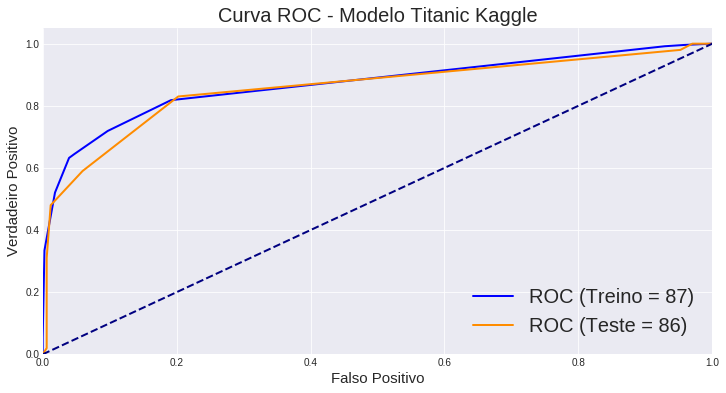

Acurácia, Gini e Área Curva ROC (Base de Treino):  83.31 74.0 87.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  80.97 72.0 86.0


In [66]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_dectree_train = round(accuracy_score(y_pred_dectree_train, y_train) * 100, 2)

#Teste
acc_dectree_test = round(accuracy_score(y_pred_dectree_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_dectree_train, tpr_dectree_train, thresholds = roc_curve(y_train, y_score_dectree_train)
roc_auc_dectree_train = 100*round(auc(fpr_dectree_train, tpr_dectree_train), 2)
gini_dectree_train = 100*round((2*roc_auc_dectree_train/100 - 1), 2)

# Teste
fpr_dectree_test, tpr_dectree_test, thresholds = roc_curve(y_test, y_score_dectree_test)
roc_auc_dectree_test = 100*round(auc(fpr_dectree_test, tpr_dectree_test), 2)
gini_dectree_test = 100*round((2*roc_auc_dectree_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_dectree_train, tpr_dectree_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_dectree_train)
plt.plot(fpr_dectree_test, tpr_dectree_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_dectree_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_dectree_train, gini_dectree_train, roc_auc_dectree_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_dectree_test, gini_dectree_test, roc_auc_dectree_test)

### Modelo 5) Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [67]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/random_forest_01.png", width=800, height=800)

#### Treinamento do modelo

In [68]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


rndforest = RandomForestClassifier(n_estimators=10, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, 
                                   min_impurity_split=None, 
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=None, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)

rndforest.fit(x_train, y_train)

# Treino
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

# Teste
y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]


#### Avaliação do modelo

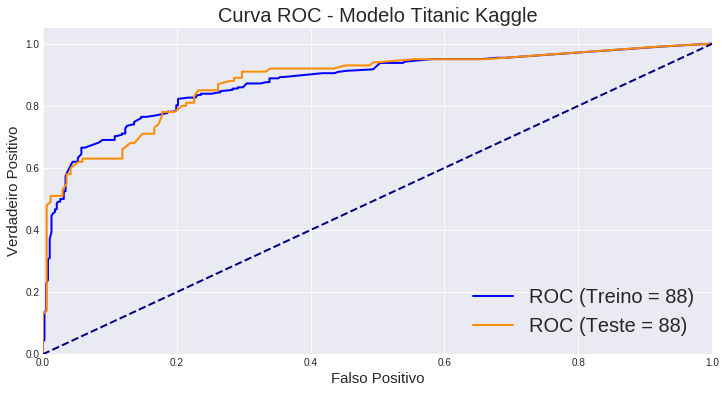

Acurácia, Gini e Área Curva ROC (Base de Treino):  83.31 76.0 88.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  79.85 76.0 88.0


In [69]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_rndforest_train = round(accuracy_score(y_pred_rndforest_train, y_train) * 100, 2)

#Teste
acc_rndforest_test = round(accuracy_score(y_pred_rndforest_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_score_rndforest_train)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)

# Teste
fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_score_rndforest_test)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_rndforest_train, tpr_rndforest_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_rndforest_train)
plt.plot(fpr_rndforest_test, tpr_rndforest_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_rndforest_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_rndforest_train, gini_rndforest_train, roc_auc_rndforest_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_rndforest_test, gini_rndforest_test, roc_auc_rndforest_test)

### Modelo 6) Gradient Boosting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [70]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/gradient_boosting_01.jpg", width=800, height=800)

#### Diferença entre Bagging e Boosting

In [71]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/bagging_boosting_01.png", width=800, height=800)

#### Treinamento do modelo

In [72]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1,
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse',
                                 min_samples_split=2, 
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 init=None, 
                                 random_state=None,
                                 max_features=None,
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto',
                                 validation_fraction=0.2, 
                                 n_iter_no_change=None,
                                 tol=0.0001)

gbc.fit(x_train, y_train)

# Treino
y_pred_gbc_train = gbc.predict(x_train)
y_score_gbc_train = gbc.predict_proba(x_train)[:,1]

# Teste
y_pred_gbc_test = gbc.predict(x_test)
y_score_gbc_test = gbc.predict_proba(x_test)[:,1]


#### Avaliação do modelo

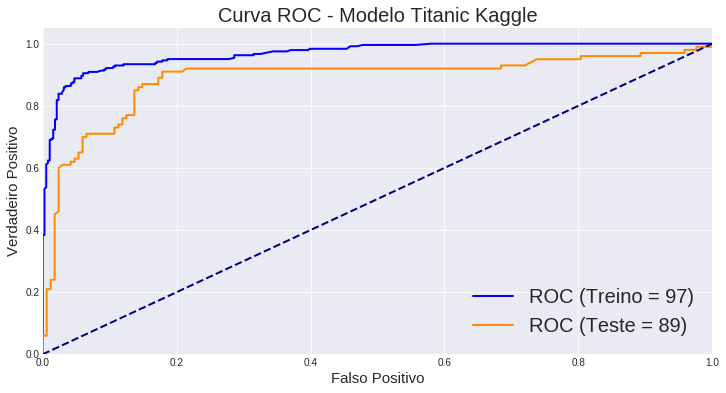

Acurácia, Gini e Área Curva ROC (Base de Treino):  92.62 94.0 97.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  83.21 78.0 89.0


In [73]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_gbc_train = round(accuracy_score(y_pred_gbc_train, y_train) * 100, 2)

#Teste
acc_gbc_test = round(accuracy_score(y_pred_gbc_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_gbc_train, tpr_gbc_train, thresholds = roc_curve(y_train, y_score_gbc_train)
roc_auc_gbc_train = 100*round(auc(fpr_gbc_train, tpr_gbc_train), 2)
gini_gbc_train = 100*round((2*roc_auc_gbc_train/100 - 1), 2)

# Teste
fpr_gbc_test, tpr_gbc_test, thresholds = roc_curve(y_test, y_score_gbc_test)
roc_auc_gbc_test = 100*round(auc(fpr_gbc_test, tpr_gbc_test), 2)
gini_gbc_test = 100*round((2*roc_auc_gbc_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_gbc_train, tpr_gbc_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_gbc_train)
plt.plot(fpr_gbc_test, tpr_gbc_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_gbc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_gbc_train, gini_gbc_train, roc_auc_gbc_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_gbc_test, gini_gbc_test, roc_auc_gbc_test)

### Modelo 8) k-Nearest Neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [74]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/k_NN.png", width=500, height=500)

#### Treinamento do modelo

In [75]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', 
                           algorithm='auto', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=None)


knn.fit(x_train, y_train)

# Treino
y_pred_knn_train = knn.predict(x_train)
y_score_knn_train = knn.predict_proba(x_train)[:,1]

# Teste
y_pred_knn_test = knn.predict(x_test)
y_score_knn_test = knn.predict_proba(x_test)[:,1]

#### Avaliação de modelo

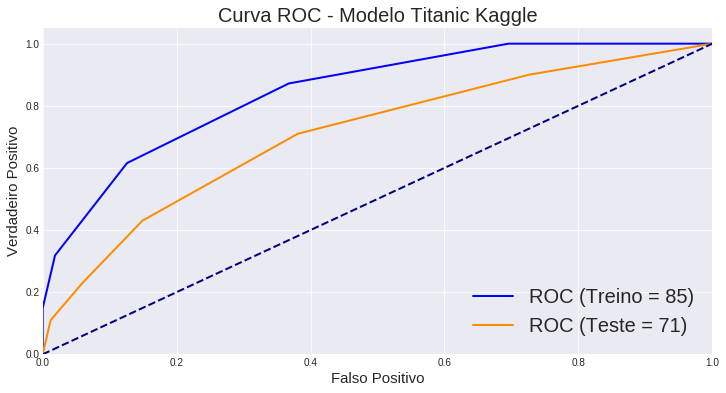

Acurácia, Gini e Área Curva ROC (Base de Treino):  77.37 70.0 85.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  69.4 42.0 71.0


In [76]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_knn_train = round(accuracy_score(y_pred_knn_train, y_train) * 100, 2)

#Teste
acc_knn_test = round(accuracy_score(y_pred_knn_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_knn_train, tpr_knn_train, thresholds = roc_curve(y_train, y_score_knn_train)
roc_auc_knn_train = 100*round(auc(fpr_knn_train, tpr_knn_train), 2)
gini_knn_train = 100*round((2*roc_auc_knn_train/100 - 1), 2)

# Teste
fpr_knn_test, tpr_knn_test, thresholds = roc_curve(y_test, y_score_knn_test)
roc_auc_knn_test = 100*round(auc(fpr_knn_test, tpr_knn_test), 2)
gini_knn_test = 100*round((2*roc_auc_knn_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_knn_train, tpr_knn_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_knn_train)
plt.plot(fpr_knn_test, tpr_knn_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_knn_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_knn_train, gini_knn_train, roc_auc_knn_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_knn_test, gini_knn_test, roc_auc_knn_test)

### Modelo 9) Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [77]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/neuronio.png", width=500, height=500)

In [78]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/perceptron.png", width=600, height=600)

#### Treinamento do modelo

In [79]:
# Perceptron
from sklearn.linear_model import Perceptron
import numpy as np

perceptron = Perceptron(penalty=None, 
                        alpha=0.01,
                        fit_intercept=True,
                        max_iter=100,
                        tol=None, 
                        shuffle=True,
                        verbose=0, 
                        eta0=1.0,
                        n_jobs=None, 
                        random_state=0, 
                        early_stopping=False, 
                        validation_fraction=0.1,
                        n_iter_no_change=5, 
                        class_weight=None,
                        warm_start=False,
                        n_iter=None)

perceptron.fit(x_train, y_train)

# Treino
y_pred_perceptron_train = perceptron.predict(x_train)
#Converte para probabilidade
y_score_perceptron_train = 1/(1+np.exp(-perceptron.decision_function(x_train)))

# Teste
y_pred_perceptron_test = perceptron.predict(x_test)
#Converte para probabilidade
y_score_perceptron_test = 1/(1+np.exp(-perceptron.decision_function(x_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


#### Avaliação do modelo

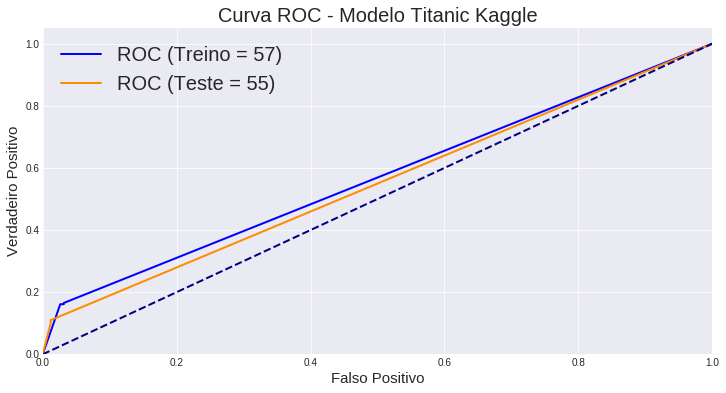

Acurácia, Gini e Área Curva ROC (Base de Treino):  65.81 14.000000000000002 56.99999999999999
Acurácia, Gini e Área Curva ROC (Base de Teste):  65.67 10.0 55.00000000000001


In [80]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_perceptron_train = round(accuracy_score(y_pred_perceptron_train, y_train) * 100, 2)

#Teste
acc_perceptron_test = round(accuracy_score(y_pred_perceptron_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_perceptron_train, tpr_perceptron_train, thresholds = roc_curve(y_train, y_score_perceptron_train)
roc_auc_perceptron_train = 100*round(auc(fpr_perceptron_train, tpr_perceptron_train), 2)
gini_perceptron_train = 100*round((2*roc_auc_perceptron_train/100 - 1), 2)

# Teste
fpr_perceptron_test, tpr_perceptron_test, thresholds = roc_curve(y_test, y_score_perceptron_test)
roc_auc_perceptron_test = 100*round(auc(fpr_perceptron_test, tpr_perceptron_test), 2)
gini_perceptron_test = 100*round((2*roc_auc_perceptron_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_perceptron_train, tpr_perceptron_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_perceptron_train)
plt.plot(fpr_perceptron_test, tpr_perceptron_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_perceptron_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_perceptron_train, gini_perceptron_train, roc_auc_perceptron_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_perceptron_test, gini_perceptron_test, roc_auc_perceptron_test)

### Modelo 10) Rede Neural (Multi-layer Perceptron classifier - MLP)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.87421&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [81]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/mlp.jpg", width=600, height=600)

In [82]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/backpropagation.jpg", width=900, height=900)

#### Treinamento do modelo

In [83]:
# Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                    activation='relu', 
                    solver='adam', 
                    alpha=0.01, 
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.001, 
                    power_t=0.5, 
                    max_iter=200, 
                    shuffle=True, 
                    random_state=None, 
                    tol=0.0001, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True,
                    early_stopping=False, 
                    validation_fraction=0.1, 
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08,
                    n_iter_no_change=10)


mlp.fit(x_train, y_train)

# Treino
y_pred_mlp_train = mlp.predict(x_train)
y_score_mlp_train = mlp.predict_proba(x_train)[:,1]

# Teste
y_pred_mlp_test = mlp.predict(x_test)
y_score_mlp_test = mlp.predict_proba(x_test)[:,1]

#### Avaliação do modelo

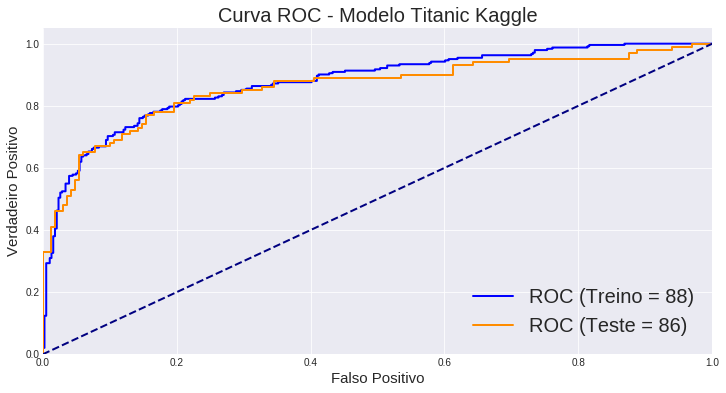

Acurácia, Gini e Área Curva ROC (Base de Treino):  82.02 76.0 88.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  82.46 72.0 86.0


In [84]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_mlp_train = round(accuracy_score(y_pred_mlp_train, y_train) * 100, 2)

#Teste
acc_mlp_test = round(accuracy_score(y_pred_mlp_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_mlp_train, tpr_mlp_train, thresholds = roc_curve(y_train, y_score_mlp_train)
roc_auc_mlp_train = 100*round(auc(fpr_mlp_train, tpr_mlp_train), 2)
gini_mlp_train = 100*round((2*roc_auc_mlp_train/100 - 1), 2)

# Teste
fpr_mlp_test, tpr_mlp_test, thresholds = roc_curve(y_test, y_score_mlp_test)
roc_auc_mlp_test = 100*round(auc(fpr_mlp_test, tpr_mlp_test), 2)
gini_mlp_test = 100*round((2*roc_auc_mlp_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_mlp_train, tpr_mlp_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_mlp_train)
plt.plot(fpr_mlp_test, tpr_mlp_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_mlp_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_mlp_train, gini_mlp_train, roc_auc_mlp_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_mlp_test, gini_mlp_test, roc_auc_mlp_test)

In [86]:
models = pd.DataFrame({
    'Modelo': ['Naive Bayes', 
              'Regressão Logística',
              'Support Vector Machines',
              'Decision Tree', 
              'Random Forest', 
              'Gradient Boosting', 
              'k-Nearest Neighbors', 
              'Perceptron', 
              'Rede Neural (MLP)'],
    
     'Gini_Treino': [gini_gaussian_train,
                    gini_logreg_train,
                    gini_svc_train,
                    gini_dectree_train,
                    gini_rndforest_train,
                    gini_gbc_train,
                    gini_knn_train,
                    gini_perceptron_train,
                    gini_mlp_train],   
    
    
    'Gini_Teste': [gini_gaussian_test,
                    gini_logreg_test,
                    gini_svc_test,
                    gini_dectree_test,
                    gini_rndforest_test,
                    gini_gbc_test,
                    gini_knn_test,
                    gini_perceptron_test,
                    gini_mlp_test]

})
model_comp = models.sort_values(by='Gini_Teste', ascending=False)
model_comp = model_comp[['Modelo','Gini_Treino','Gini_Teste']]
model_comp

,Modelo,Gini_Treino,Gini_Teste
5,Gradient Boosting,94.0,78.0
4,Random Forest,76.0,76.0
3,Decision Tree,74.0,72.0
8,Rede Neural (MLP),76.0,72.0
1,Regressão Logística,72.0,70.0
0,Naive Bayes,68.0,66.0
2,Support Vector Machines,60.0,54.0
6,k-Nearest Neighbors,70.0,42.0
7,Perceptron,14.0,10.0
